<a href="https://colab.research.google.com/github/IreneYIN7/CSC-Data_Mining-Machine_Learning_Projects/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-321: Data Mining and Machine Learning
# Irene Yin
## Final Project


### Abstract
For this final project, I'm going to use the Bike Sharing Dataset. The Goal is to perdict the count of total rental bikes including both casual and registered users. I'm going to first observe the data, apply the data manipulation, and then start the feature selections, finally apply the models that are propoer for this task. I will also compare the ability of each model's predicting power in the later experiment. 

### Introduction

The purpose of this task is to predict the total number of sharing-bikes rented by the casual and registered users. A problem I'm going to address is that what would be the most imoprtant features that would influence the total number of the rental bike from people. This is a regression task that the outcomes we are going to predict are the continuous values. The attribute I'm trying to learn is: cnt --> count, which is the total number of rental bikes that both casual and registered users rented. 

### Motivation/State of Art

Along with the improvement of people's life quality, government and people are focuing more on the public construction and the public service. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. By using the sharing-bike, it could help to improve the environment, traffic, as well as our health. 

Moreover, by seeing and interpreting these data, we would also have some sense of what is the features that would lead to people to use the bike or not. So that we could make some changes or improvements based on that. 

There are some people learned this dataset and we could find the specific learning process via github. The best result I could find is the learning done by Patrick Gebert. He learned the whole dataset and foudn that the hour and temperature features are the most influential and important features that would influence the outcome. 


### DATA

The dataset contains 17389 instances and 16 attributes. The features are related to people's using demands towards the sharing bike. I get it from [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 
The data IS in CSV format. There are 3 files: day.csv, hour.csv, and Readme.txt file. day.csv data is daily based data, whereas hour.csv is hourily based data which contains 17389 instances and 16 features. 
We will use hour.csv data this time since the daily based dataset only has 732 instances which are too small for us to come up with the meaningful conclusion.

Based on the [description of the data](https://github.com/IreneYIN7/CSV_data/blob/main/README.md), we could know that all the data in this data set are neumerical data, except the date. 

Apart from that both hour.csv and day.csv have the following fields, except hr which is not available in day.csv:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

There are no missing value in this data. 



### Experiment


#### Part 1: Data Manipulation

We will first check and observe the data. We need to make the whole dataset organized and doable for the later tasks.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# See the day.csv data
# Assign column names
labels = ['dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual',
          'registered','cnt']
missing_values = ["?"]

# Load the training data
# I've added column headings
# I've added the missing value string
# and in order to make that work, I've skipped the initial space

bike_data = pd.read_csv("https://raw.githubusercontent.com/IreneYIN7/CSV_data/main/hour.csv",names=labels,na_values = missing_values,skipinitialspace=True)

pre_rows,pre_cols = bike_data.shape
print("This is the sharing-bike training data set. It has", pre_rows, "instances, and it has", pre_cols, "features.\n\n")

# Show the head of the data
bike_data.head()

This is the sharing-bike training data set. It has 17380 instances, and it has 16 features.




,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


In [ ]:
# boxplot for the data
bike_data.drop('instant',inplace=True)
#bike_data[:24*10].plot(x='dteday', y='cnt')

#### part 2: Feature Selection

Now, We need to drop the repeated features and meaningless features in order to make the model more efficient. 

We could see that the first row is the feature names row. So, we will first drop the first row.


After observing the data, we could see that the season, and seathersit features can be represented by the temp, atemp （feeling temp）, hum, and windspeed features. Also, atemp features is strongly depend on the temp feature. Other than that, the month can be represented by the holiday. Hence, we could drop the season, mnth, atemp and weathersit features.  

Also, the weekday and holiday can also be represented by the workingday features. The workingday will be 1 if it's neither the weekday (0-4) nor holiday, otherwise, it will 0 (means it's either weekendday (5-6) or holidays). Hence, we could also drop holiday and weekday.

As for the dteday, we could also drop it since it could be represented by the yr. And it's meaningless to keep track on the specific day. After dropping the specific days, part our tasks would be if the different parts of the day would have influence towards the output (the usage for the sharing-bike). In this dataset, we have 365*2 days for us to learn.

Last, the casual feature is the the count of the casual users who rent bike and the registered feature is the count of the registered users who rent bike. The cnt feature is the combination of the casual users and the registered users. In this case, we would focus on the total count of the sharing-bike. Thus, the count and registered features can also be droped since the cnt feature represents both of them. 


In [ ]:
# drop features that are repetitions.

# drop the first feature-name row


bike_data.drop('season',axis=1,inplace=True)
bike_data.drop('mnth',axis=1,inplace=True)
bike_data.drop('weathersit',axis=1,inplace=True)
bike_data.drop('weekday',axis=1,inplace=True)
bike_data.drop('dteday',axis=1,inplace=True)
bike_data.drop('casual',axis=1,inplace=True)
bike_data.drop('registered',axis=1,inplace=True)
bike_data.drop('atemp',axis=1,inplace=True)
bike_data.drop('holiday',axis=1,inplace=True)


pre_rows,pre_cols = bike_data.shape
print("This is the sharing-bike training data set. It has", pre_rows, "instances, and it has", pre_cols, "features.\n\n")

bike_data.head()


This is the sharing-bike training data set. It has 17379 instances, and it has 7 features.




,yr,hr,workingday,temp,hum,windspeed,cnt
1,0,0,0,0.24,0.81,0,16
2,0,1,0,0.22,0.8,0,40
3,0,2,0,0.22,0.8,0,32
4,0,3,0,0.24,0.75,0,13
5,0,4,0,0.24,0.75,0,1



Apart from that, we could notict that the hr feature is encoded to be from 0-23. This are going to end up with comparisons we probably don't mean. Hence, we need to use one-hot encoding to first make it into 24 different features. Then we need to categorize the hr feature into parts of the day: early morning (5-9), late morning(10-12), early afternoon (13-15), late afternoon(16-17), evening (18-20), and Night (21-4).


Then, we need to encoding these category values into numerical values by using one-hot encoding, because our algorithms need numeric data. 

In [ ]:
# One-hot encoding the hr feature.
bike_data_copy = bike_data.copy()
bike_data_hr = bike_data_copy['hr'].copy()
bike_data_copy.drop(['hr'],axis = 1, inplace = True)

bike_data_hr = pd.get_dummies(bike_data_hr, prefix_sep='_')


final_rows,final_cols = bike_data_hr.shape
print("This is the hour feature training data set after one-hot encoding.\nIt has",final_rows, "instances, and it has", final_cols, "features\n\n")

# Then, we need to group the hours together into 6 categories
bike_data_hr['early_morni'] = bike_data_hr['5'] + bike_data_hr['6'] + bike_data_hr['7'] + bike_data_hr['8'] +bike_data_hr['9']
bike_data_hr.drop(['5','6','7','8','9'],axis=1,inplace=True)

bike_data_hr['late_morni'] = bike_data_hr['10'] + bike_data_hr['11'] + bike_data_hr['12']
bike_data_hr.drop(['10','11','12'],axis=1,inplace=True)

bike_data_hr['early_aftern'] = bike_data_hr['13'] + bike_data_hr['14'] + bike_data_hr['15']
bike_data_hr.drop(['13','14','15'],axis=1,inplace=True)

bike_data_hr['late_aftern'] = bike_data_hr['16'] + bike_data_hr['17']
bike_data_hr.drop(['16','17'],axis=1,inplace=True)

bike_data_hr['evening'] = bike_data_hr['18'] + bike_data_hr['19']+ bike_data_hr['20']
bike_data_hr.drop(['18','19','20'],axis=1,inplace=True)

bike_data_hr['night'] = bike_data_hr['21'] + bike_data_hr['22']+ bike_data_hr['23']+ bike_data_hr['0']+ bike_data_hr['1']+ bike_data_hr['2']+ bike_data_hr['3']+ bike_data_hr['4']
bike_data_hr.drop(['21','22','23','0','1','2','3','4'],axis=1,inplace=True)



final_rows,final_cols = bike_data_hr.shape
print("This is the hour feature training data set after grouping.\nIt has",final_rows, "instances, and it has", final_cols, "features\n\n")
bike_data_hr.head()

# Add hrs back to the dataset, and rearrange the data with proper order.
bike_data_cnt = bike_data_copy['cnt'].copy()
bike_data_copy.drop(['cnt'],axis = 1, inplace = True)

bike_data_ear_mor = bike_data_hr['early_morni'].copy()
bike_data_late_mor = bike_data_hr['late_morni'].copy()
bike_early_aftern = bike_data_hr['early_aftern'].copy()
bike_late_aftern = bike_data_hr['late_aftern'].copy()
bike_evening = bike_data_hr['evening'].copy()
bike_night = bike_data_hr['night'].copy()

bike_data_copy['early_morni'] = bike_data_ear_mor
bike_data_copy['late_morni'] = bike_data_late_mor
bike_data_copy['early_aftern'] = bike_early_aftern
bike_data_copy['late_aftern'] = bike_late_aftern
bike_data_copy['evening'] = bike_evening
bike_data_copy['night'] = bike_night
bike_data_copy['cnt'] = bike_data_cnt


bike_data_copy.head()

final_rows,final_cols = bike_data_copy.shape
print("This is the Bike data set after data manipulation.\nIt has",final_rows, "instances, and it has", final_cols, "features\n\n")
bike_data_copy.head()




This is the hour feature training data set after one-hot encoding.
It has 17379 instances, and it has 24 features


This is the hour feature training data set after grouping.
It has 17379 instances, and it has 6 features


This is the Bike data set after data manipulation.
It has 17379 instances, and it has 12 features




,yr,workingday,temp,hum,windspeed,early_morni,late_morni,early_aftern,late_aftern,evening,night,cnt
1,0,0,0.24,0.81,0,0,0,0,0,0,1,16
2,0,0,0.22,0.8,0,0,0,0,0,0,1,40
3,0,0,0.22,0.8,0,0,0,0,0,0,1,32
4,0,0,0.24,0.75,0,0,0,0,0,0,1,13
5,0,0,0.24,0.75,0,0,0,0,0,0,1,1


In [ ]:

#bike_data_copy.info()
bike_data_copy.describe(include='all')
bike_data_copy['yr'] = bike_data_copy.yr.astype('int64')
bike_data_copy['workingday'] = bike_data_copy.workingday.astype('int64')
bike_data_copy['temp'] = bike_data_copy.temp.astype('float')
bike_data_copy['hum'] = bike_data_copy.hum.astype('float')
bike_data_copy['windspeed'] = bike_data_copy.windspeed.astype('float')
bike_data_copy['cnt'] = bike_data_copy.cnt.astype('int')
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   workingday    17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   early_morni   17379 non-null  uint8  
 6   late_morni    17379 non-null  uint8  
 7   early_aftern  17379 non-null  uint8  
 8   late_aftern   17379 non-null  uint8  
 9   evening       17379 non-null  uint8  
 10  night         17379 non-null  uint8  
 11  cnt           17379 non-null  int64  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 1.0+ MB


In [ ]:
corrMatrix = bike_data_copy.corr()
print(corrMatrix)

                    yr  workingday      temp  ...   evening     night       cnt
yr            1.000000   -0.002196  0.040913  ... -0.000900  0.003864  0.250495
workingday   -0.002196    1.000000  0.055390  ...  0.001096 -0.002593  0.030284
temp          0.040913    0.055390  1.000000  ...  0.054470 -0.108649  0.404772
hum          -0.083546    0.015688 -0.069881  ... -0.112525  0.236742 -0.322911
windspeed    -0.008740   -0.011830 -0.023125  ...  0.061732 -0.156346  0.093234
early_morni  -0.000220    0.001675 -0.130774  ... -0.194565 -0.360542 -0.033129
late_morni   -0.001593   -0.000260  0.047578  ... -0.143656 -0.266205  0.046513
early_aftern -0.001423    0.000332  0.129698  ... -0.143844 -0.266554  0.123733
late_aftern  -0.001551    0.000547  0.098740  ... -0.114814 -0.212758  0.329345
evening      -0.000900    0.001096  0.054470  ...  1.000000 -0.266344  0.274979
night         0.003864   -0.002593 -0.108649  ... -0.266344  1.000000 -0.479409
cnt           0.250495    0.030284  0.40

#### Part 3: Regression Task

In this project, we will use 10-fold cross validation to split the data and which could let us better evaluate. Because this is a regression task, we will use the models that are suitable for the regression task. (particularly, with regressors). We will use Linear Regression, KNN(regressor) and naive bayes regression(BayesianRidge). Apart from that, we will also use the following methods: 

[support vector machine for regression](https://scikit-learn.org/stable/modules/svm.html#regression).


[Decision Tree for regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html).

[AdaBoost for Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html).

In [ ]:
import time
from scipy import stats
import math
import numpy as np

# import models
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.dummy import DummyRegressor

# scoring metrics
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

As we could see, after the manipulation, all the features are in the normalized form. Temp, atemp, hum, and windspeed are all in the normalized form.

We will use 10-fold cross validation to slice up the data, and call each model on the data.
The models I will use for this regression task are:

- zeroR
- Linear regression
- knn Regressor (k=5)
- knn Regressor (k=7)
- decision trees Regressor
- AdaBoost
- BayesianRidge
- Random Forest

##### round 1: 11 features

This is the sharing-bike training data set. It has 17379 instances, and it has 11 features.

zr: 181.38 (0.84)
LR: 129.02 (7.92)
KN5: 111.38 (10.54)
KN7: 108.97 (10.53)
DT: 141.59 (16.23)
ADA: 134.39 (17.44)
Bayes: 129.04 (7.94)
RF: 112.76 (11.90)



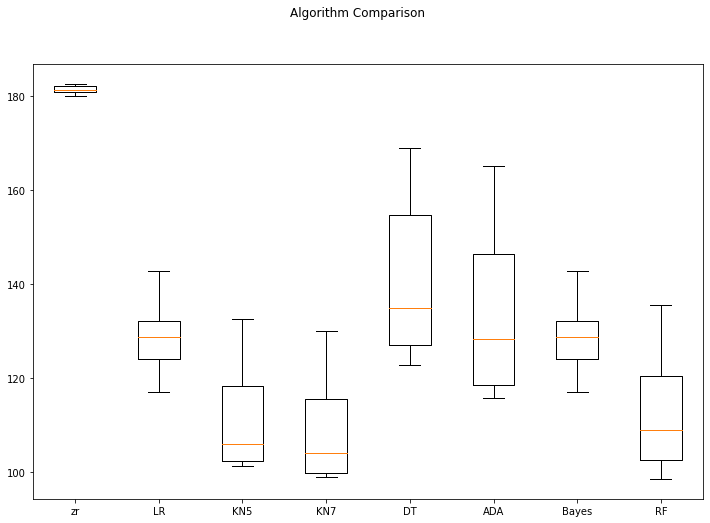

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

array = bike_data_copy.values
X = array[:,0:-1]
y = array[:,-1]

rows,cols = X.shape
print("This is the sharing-bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

# prepare configuration for cross validation test harness
seed = 1

models = [
          DummyRegressor(),
          LinearRegression(),
          KNeighborsRegressor(),
          KNeighborsRegressor(n_neighbors=7),
          DecisionTreeRegressor(),
          AdaBoostRegressor(n_estimators=100),
          BayesianRidge(),
          RandomForestRegressor(random_state=0, n_estimators=300),
          
]
name = ['zr','LR', 'KN5', 'KN7', 'DT','ADA','Bayes','RF']

# train and test the model

model_result = []
regressors = []
scorings = 'neg_mean_squared_error'
msg1 = []
for index in range(len(models)):
  kfold = model_selection.StratifiedKFold(n_splits=10)
  cv_results = model_selection.cross_val_score(models[index],X,y,cv=kfold,scoring=scorings)
  cv_result = [abs(j)**0.5 for j in cv_results]
  model_result.append(cv_result)
  regressors.append(name[index])
  msg = name[index]+ ": {:.2f} ({:.2f})".format(np.mean(cv_result), np.std(cv_result))
  msg1.append((np.mean(cv_result), np.std(cv_result)))
  print(msg)

# boxplot algorithm comparison
print()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_result)
ax.set_xticklabels(regressors)
plt.show()


# I will later only focus the model BayesianRidge

Bayes_full_score = model_result[6]


In [ ]:
print(len(msg1))
print(msg1)

8
[(181.38065274475747, 0.8443521751880192), (129.0202577101718, 7.9172549946086805), (111.38135828476334, 10.543236552263714), (108.96673346030079, 10.530409770327632), (141.59228627547043, 16.232081335346212), (134.39416483396752, 17.44320450540752), (129.03718281064147, 7.935673488728874), (112.75976759110195, 11.902784235893176)]


According to the rmse score of each method, we could see the all the methods outperforms the baseline(181.38). The best model in this round is the KNN model (rmse=109).

Now, I will compare the performance of my regressors by using scipy.stats.ttest_rel. 

In [ ]:
from scipy import stats
# I want to compare my results statistically. 
# To do that, I'm using the paired T-Test as 
# described in the slides

# This is the test where the classifiers are tested over the same data

# If we accept the null hypothesis, we can say that (for p<0.05), there is no
# statistically significant difference between our results (they are, statistically, the same)

# If we reject the null hypothesis, then there is a statistically significant difference
# in the results (for p<0.05)


print()
print('***Performing t-tests***\n\n')

ttest,pval = stats.ttest_rel(model_result[0], model_result[1])

print('P-Val between ZeroR and Linear Regression (p<0.05): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()    

ttest,pval = stats.ttest_rel(model_result[1], model_result[6])
print('P-Val between Linear Regression and BayesianRidge (p<0.05): %.2f' % pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")




***Performing t-tests***


P-Val between ZeroR and Linear Regression (p<0.05): 0.00
reject null hypothesis

P-Val between Linear Regression and BayesianRidge (p<0.05): 0.29
accept null hypothesis


After the comparison, we could see that the method BayesianRidge has the statistically significant difference in the result. Hence, in the later feature elimination, I will use the BayesianRidge model.

In [ ]:

print('\n***Examining Features***\n\n')

# I will use RFE to select the 7 best features. This is MY choice of how many
# features to select for next round.
CurrentNames = ['yr','workingday','temp','hum','windspeed','early_morni','late_morni','early_aftern','late_aftern',
                'evening','night']
											
lin = LinearRegression()
rfe = RFE(estimator=lin, step=1,n_features_to_select=7)
rfe.fit(X, y)

print('Feature : Ranking')
print('-----------------')
for i in range(len(CurrentNames)):
  print(CurrentNames[i],' : ',rfe.ranking_[i])






***Examining Features***


Feature : Ranking
-----------------
yr  :  1
workingday  :  5
temp  :  1
hum  :  1
windspeed  :  1
early_morni  :  3
late_morni  :  2
early_aftern  :  4
late_aftern  :  1
evening  :  1
night  :  1


##### round 2: 7 features
Now we are selected 7 best features.

We are going to the third round of model testing for BayesianRidge.

In [ ]:
# drop the non-selected data
bike_data_copy_ = bike_data_copy.copy()
bike_data_copy_.drop('workingday',axis=1,inplace=True)
bike_data_copy_.drop('early_morni',axis=1,inplace=True)
bike_data_copy_.drop('late_morni',axis=1,inplace=True)
bike_data_copy_.drop('early_aftern',axis=1,inplace=True)
bike_data_copy_.head()

,yr,temp,hum,windspeed,late_aftern,evening,night,cnt
1,0,0.24,0.81,0.0,0,0,1,16
2,0,0.22,0.80,0.0,0,0,1,40
3,0,0.22,0.80,0.0,0,0,1,32
4,0,0.24,0.75,0.0,0,0,1,13
5,0,0.24,0.75,0.0,0,0,1,1


In [ ]:
# BayesianRidge

import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Print the results from the full model
msg = "BayesianRidge, 11 features: {:.2f} ({:.2f})".format(np.mean(Bayes_full_score), np.std(Bayes_full_score))
print(msg)
print()

array = bike_data_copy_.values
X_small = array[:,0:-1]
y_small = array[:,-1]

rows,cols = X_small.shape
print("This is the sharing-bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

# prepare configuration for cross validation test harness
seed = 1

# train and test the only model BayesianRidge

cv_results_ = model_selection.cross_val_score(BayesianRidge(), X_small, y_small, cv=10, scoring=scorings)
cv_results_2 = [abs(j)**0.5 for j in cv_results_]
msg2 = "BayesianRidge, 7 features: {:.2f} ({:.2f})".format(np.mean(cv_results_2), np.std(cv_results_2))
print(msg2)
print()


# This time conduct an t-test (because the feature sets are different)
# between this experiment, and the previous one with BayesianRidge, above

# Same rules apply - accepting the null hypothesis means that there is NOT a statistically
# significant difference between the two scores. IF that's the case, then I've got a smaller model
# with EQUAL predictive power to the larger model.

ttest,pval = stats.ttest_ind(cv_results_2, model_result[6])
print('P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



BayesianRidge, 11 features: 129.04 (7.94)

This is the sharing-bike training data set. It has 17379 instances, and it has 7 features.

BayesianRidge, 7 features: 127.43 (29.72)

P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): 0.88
accept null hypothesis


Now, by using 7 features with the model BayesianRidge, we have the there is not a statistically significant difference between the two scores (score of 7 features and score of 9 features). That means that by now, we have a smaller model which is with 7 features, with equal predictive power to the larger model. 

In [ ]:

print('\n***Examining Features***\n\n')

# I've used RFE to select the 5 best features. This is MY choice of how many
# features to select for next round.
CurrentNames = ['yr','workingday','temp','hum','windspeed','early_morni','late_morni','early_aftern','late_aftern',
                'evening','night']
											
lin = LinearRegression()
rfe = RFE(estimator=lin, step=1,n_features_to_select=5)
rfe.fit(X, y)

print('Feature : Ranking')
print('-----------------')
for i in range(len(CurrentNames)):
  print(CurrentNames[i],' : ',rfe.ranking_[i])






***Examining Features***


Feature : Ranking
-----------------
yr  :  2
workingday  :  7
temp  :  1
hum  :  1
windspeed  :  3
early_morni  :  5
late_morni  :  4
early_aftern  :  6
late_aftern  :  1
evening  :  1
night  :  1


##### round 3: 5 features
Now we‘ve selected 5 best features.

We are going to the 4th round of model testing to see how is the rmse changes. 

In [ ]:

# drop the non-selected data
bike_data_copy_ = bike_data_copy.copy()
bike_data_copy_.drop('yr',axis=1,inplace=True)
bike_data_copy_.drop('workingday',axis=1,inplace=True)
bike_data_copy_.drop('early_morni',axis=1,inplace=True)
bike_data_copy_.drop('windspeed',axis=1,inplace=True)
bike_data_copy_.drop('late_morni',axis=1,inplace=True)
bike_data_copy_.drop('early_aftern',axis=1,inplace=True)


In [ ]:
# BayesianRidge

import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Print the results from the full model
msg = "BayesianRidge, 11 features: {:.2f} ({:.2f})".format(np.mean(Bayes_full_score), np.std(Bayes_full_score))
print(msg)
print()

# Print the results from the 7 feature model
msg2 = "BayesianRidge, 7 features: {:.2f} ({:.2f})".format(np.mean(cv_results_2), np.std(cv_results_2))
print(msg2)
print()


array = bike_data_copy_.values
X_small = array[:,0:-1]
y_small = array[:,-1]

rows,cols = X_small.shape
print("This is the sharing-bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

# prepare configuration for cross validation test harness
seed = 1

# train and test the only model BayesianRidge

cv_results_ = model_selection.cross_val_score(BayesianRidge(), X_small, y_small, cv=10, scoring=scorings)
cv_results_3 = [abs(j)**0.5 for j in cv_results_]
msg3 = "BayesianRidge, 5 features: {:.2f} ({:.2f})".format(np.mean(cv_results_3), np.std(cv_results_3))
print(msg3)
print()


# This time conduct an t-test (because the feature sets are different)
# between this experiment, and the previous one with BayesianRidge, above

# Same rules apply - accepting the null hypothesis means that there is NOT a statistically
# significant difference between the two scores. IF that's the case, then I've got a smaller model
# with EQUAL predictive power to the larger model.

ttest,pval = stats.ttest_ind(cv_results_3, cv_results_2)
print('P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



BayesianRidge, 11 features: 129.04 (7.94)

BayesianRidge, 7 features: 127.43 (29.72)

This is the sharing-bike training data set. It has 17379 instances, and it has 5 features.

BayesianRidge, 5 features: 135.95 (31.69)

P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): 0.56
accept null hypothesis


Agagin, by using 5 features with the model BayesianRidge, we have the there is not a statistically significant difference between the two scores (score of 7 features and score of 5 features). That means that by now, we have a smaller model which is with 5 features, with equal predictive power to the larger model. 

In [ ]:

print('\n***Examining Features***\n\n')

# I've used RFE to select the 2 best features. This is MY choice of how many
# features to select for next round.
CurrentNames = ['yr','workingday','temp','hum','windspeed','early_morni','late_morni','early_aftern','late_aftern',
                'evening','night']
											
lin = LinearRegression()
rfe = RFE(estimator=lin, step=1,n_features_to_select=2)
rfe.fit(X, y)

print('Feature : Ranking')
print('-----------------')
for i in range(len(CurrentNames)):
  print(CurrentNames[i],' : ',rfe.ranking_[i])






***Examining Features***


Feature : Ranking
-----------------
yr  :  5
workingday  :  10
temp  :  1
hum  :  1
windspeed  :  6
early_morni  :  8
late_morni  :  7
early_aftern  :  9
late_aftern  :  3
evening  :  4
night  :  2


##### round 5: 2 features
Now we are selected 2 best features.

We are going to the 5th round of model testing to see how is the rmse changes. 

In [ ]:
# drop the non-selected data
bike_data_copy_ = bike_data_copy.copy()
bike_data_copy_.drop('yr',axis=1,inplace=True)
bike_data_copy_.drop('workingday',axis=1,inplace=True)
bike_data_copy_.drop('early_morni',axis=1,inplace=True)
bike_data_copy_.drop('windspeed',axis=1,inplace=True)
bike_data_copy_.drop('late_morni',axis=1,inplace=True)
bike_data_copy_.drop('early_aftern',axis=1,inplace=True)
bike_data_copy_.drop('late_aftern',axis=1,inplace=True)
bike_data_copy_.drop('evening',axis=1,inplace=True)
bike_data_copy_.drop('night',axis=1,inplace=True)
bike_data_copy_.head()

,temp,hum,cnt
1,0.24,0.81,16
2,0.22,0.80,40
3,0.22,0.80,32
4,0.24,0.75,13
5,0.24,0.75,1


In [ ]:
# BayesianRidge

import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Print the results from the full model
msg = "BayesianRidge, 11 features: {:.2f} ({:.2f})".format(np.mean(Bayes_full_score), np.std(Bayes_full_score))
print(msg)
print()

# Print the results from the 7 feature model
msg2 = "BayesianRidge, 7 features: {:.2f} ({:.2f})".format(np.mean(cv_results_2), np.std(cv_results_2))
print(msg2)
print()

# Print the results from the 5 feature model
msg3 = "BayesianRidge, 5 features: {:.2f} ({:.2f})".format(np.mean(cv_results_3), np.std(cv_results_3))
print(msg3)
print()

array = bike_data_copy_.values
X_small = array[:,0:-1]
y_small = array[:,-1]

rows,cols = X_small.shape
print("This is the sharing-bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

# prepare configuration for cross validation test harness
seed = 1

# train and test the only model BayesianRidge

cv_results_ = model_selection.cross_val_score(BayesianRidge(), X_small, y_small, cv=10, scoring=scorings)
cv_results_4 = [abs(j)**0.5 for j in cv_results_]
msg4 = "BayesianRidge, 2 features: {:.2f} ({:.2f})".format(np.mean(cv_results_4), np.std(cv_results_4))
print(msg4)
print()


# This time conduct an t-test (because the feature sets are different)
# between this experiment, and the previous one with BayesianRidge, above

# Same rules apply - accepting the null hypothesis means that there is NOT a statistically
# significant difference between the two scores. IF that's the case, then I've got a smaller model
# with EQUAL predictive power to the larger model.

ttest,pval = stats.ttest_ind(cv_results_4, cv_results_3)
print('P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



BayesianRidge, 11 features: 129.04 (7.94)

BayesianRidge, 7 features: 127.43 (29.72)

BayesianRidge, 5 features: 135.95 (31.69)

This is the sharing-bike training data set. It has 17379 instances, and it has 2 features.

BayesianRidge, 2 features: 156.21 (41.67)

P-Val between full-feature and reduced feature data set using BayesianRidge (p<0.05): 0.26
accept null hypothesis


Agagin, by using 2 features with the model BayesianRidge, we have the there is not a statistically significant difference between the two scores (score of 5 features and score of 2 features). That means that by now, we have a smaller model which is with 5 features, with equal predictive power to the larger model. 

This shows that by now, the most important/influential features are humidity and temperature. These two features are the most important features that would effect the number of bikes people rent.  

#### Find the best features relatively by using CV score

Now we will found out the best features for the problem set by RFECV. 

This is the sharing bike training data set. It has 17379 instances, and it has 11 features.



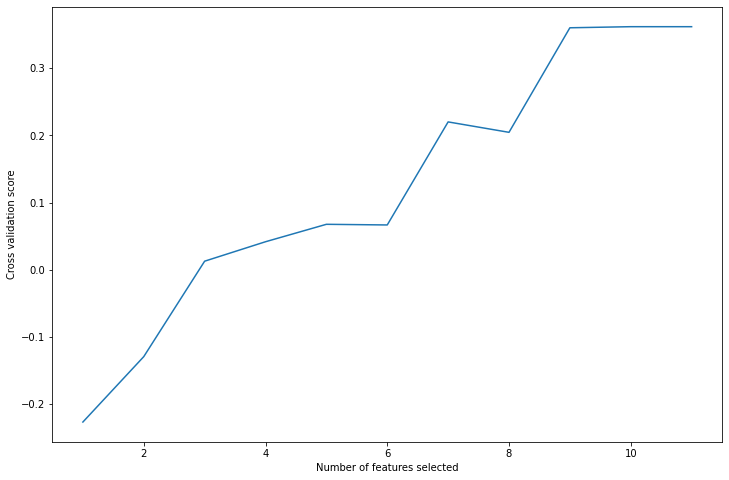


Feature : Ranking
-----------------
yr  :  1
workingday  :  2
temp  :  1
hum  :  1
windspeed  :  1
early_morni  :  1
late_morni  :  1
early_aftern  :  1
late_aftern  :  1
evening  :  1
night  :  1


In [ ]:
# Above, I selected 2 features by RFE. Instead I can use the package
# RFECV, which performs RFE with cross-validation, to FIND the best features
# for this problem set.

# NOTE HOWEVER that this means the BEST features by RFE. There could be other
# combination of features that outperform these

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

rows,cols = X.shape
print("This is the sharing bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

selector = RFECV(estimator=lin, step=1, cv=5)
selector = selector.fit(X, y)


# I can also plot the CV score AGAINST the number of features
# For visual confirmation of the best score / feature combination

plt.figure(figsize=(12,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

print()

print('Feature : Ranking')
print('-----------------')
for i in range(len(CurrentNames)):
  print(CurrentNames[i],' : ',selector.ranking_[i])

In [ ]:
# then we will create a new dataframe 

bike_data_copy_ = bike_data_copy.copy()
bike_data_copy_.drop('workingday',axis=1,inplace=True)
bike_data_copy_.head()


,yr,temp,hum,windspeed,early_morni,late_morni,early_aftern,late_aftern,evening,night,cnt
1,0,0.24,0.81,0.0,0,0,0,0,0,1,16
2,0,0.22,0.80,0.0,0,0,0,0,0,1,40
3,0,0.22,0.80,0.0,0,0,0,0,0,1,32
4,0,0.24,0.75,0.0,0,0,0,0,0,1,13
5,0,0.24,0.75,0.0,0,0,0,0,0,1,1


In [ ]:
# And rerun the experiment with BayesianRidge
# print out all the scores for NB so we can compare them

array = bike_data_copy_.values

X_med = array[:,0:-1]
y_med = array[:,-1]

rows,cols = X_med.shape
print("This is the sharing bike training data set. It has", rows, "instances, and it has", cols, "features.\n")

cv_result_10f = model_selection.cross_val_score(BayesianRidge(), X_med, y_med, cv=10, scoring=scorings)
cv_results_5 = [abs(j)**0.5 for j in cv_result_10f]
msg5 = "BayesianRidge, 10 features: {:.2f} ({:.2f})".format(np.mean(cv_results_5), np.std(cv_results_5))
print(msg5)
print()


print('Sharing-bike: RESULTS')
# Print the results from the full model
msg = "11 features: {:.2f} ({:.2f})".format(np.mean(Bayes_full_score), np.std(Bayes_full_score))
print(msg)
print()

# Print the results from the 7 feature model
msg2 = "7 features: {:.2f} ({:.2f})".format(np.mean(cv_results_2), np.std(cv_results_2))
print(msg2)
print()

# Print the results from the 5 feature model
msg3 = "5 features: {:.2f} ({:.2f})".format(np.mean(cv_results_3), np.std(cv_results_3))
print(msg3)
print()

# Print the results from the 2 feature model
msg4 = "2 features: {:.2f} ({:.2f})".format(np.mean(cv_results_4), np.std(cv_results_4))
print(msg4)
print()




This is the sharing bike training data set. It has 17379 instances, and it has 10 features.

BayesianRidge, 10 features: 127.39 (29.70)

Sharing-bike: RESULTS
11 features: 129.04 (7.94)

7 features: 127.43 (29.72)

5 features: 135.95 (31.69)

2 features: 156.21 (41.67)



#### Result: Back to all models

We could see that indeed, the 10 features score is the smallest rmse scores among all the results, which is the best (among 11,7,5,2 features).

These 10 features are : year,	temperature,	humidity,	windspeed,	early morning,	late morning	early afternoon,	late afternoon,	evening, and night. These 10 features would have the most influence on the output, which is the number of sharing bike people would rent. 


zr, 10 features: 181.38 (0.84)
zr, 11 features: 181.38 (0.84)

LR, 10 features: 129.02 (7.92)
LR, 11 features: 129.02 (7.92)

KN5, 10 features: 111.38 (10.54)
KN5, 11 features: 111.38 (10.54)

KN7, 10 features: 108.97 (10.53)
KN7, 11 features: 108.97 (10.53)

DT, 10 features: 141.64 (15.66)
DT, 11 features: 141.59 (16.23)

ADA, 10 features: 133.13 (16.80)
ADA, 11 features: 134.39 (17.44)

Bayes, 10 features: 129.04 (7.94)
Bayes, 11 features: 129.04 (7.94)

RF, 10 features: 112.76 (11.90)
RF, 11 features: 112.76 (11.90)



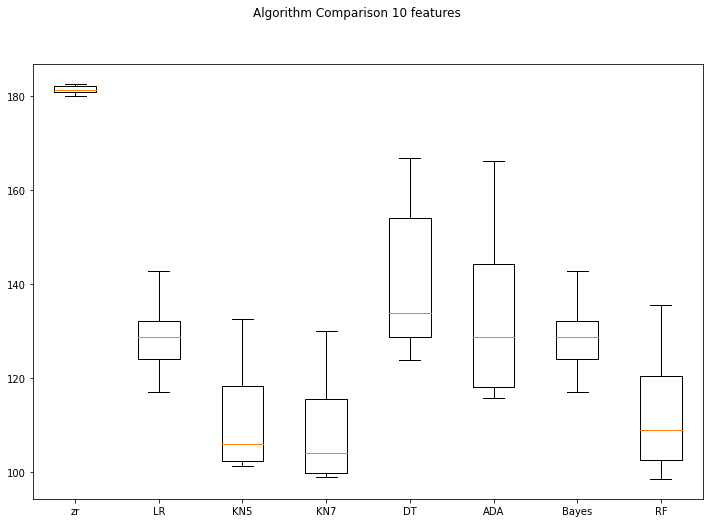

In [ ]:
# return 10 features to all the models and to see how they perform.


model_result2 = []
regressors2 = []
for index in range(len(models)):
  kfold = model_selection.StratifiedKFold(n_splits=10)
  cv_results = model_selection.cross_val_score(models[index],X,y,cv=kfold,scoring=scorings)
  cv_result = [abs(j)**0.5 for j in cv_results]
  model_result2.append(cv_result)
  regressors2.append(name[index])
  msg2 = name[index]+ ", 10 features: {:.2f} ({:.2f})".format(np.mean(cv_result), np.std(cv_result))

  prevmsg = name[index]+ ", 11 features: {:.2f} ({:.2f})".format(msg1[index][0], msg1[index][1])
  print()
  print(msg2)
  print(prevmsg)


# boxplot algorithm comparison
print()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison 10 features')
ax = fig.add_subplot(111)
plt.boxplot(model_result2)
ax.set_xticklabels(regressors2)
plt.show()



### Results

Based on what the experiment shows above, we have 10 features that are selected to the most important features by using RFECV. They are: year, temp, hum, windspeed, early_morning, late_morning, early_afternoon, late_afternoon, evening, and night. After we put them back to all the models and compare the rmse scores with that of 11 features, we could see that only Decision Tree model improved. The others are almost staying the same. 

But we could also see that according to the 11, 10, 7, 5 and 2 features used on the BayesianRidge method, the 10 features indeed performs the best score. 

|  # of feature    | RMSE | St.Devi.|
|-----------------|----------|-----------------|
|  11  |   129.04   |      7.94       |
|  10  |   127.43  |       29.7       |
|7|   135.95   |       29.72       |
|5|   135.95   |       31.69        |
|     2     |  156.21   |       41.67       |


                                                        Fig 1. Table of rmse of BayesianRidge

Apart from that, after I used RFE by just focusing on only one model: BayesianRidge, I have that the model can be narrow down to 2 features. This means that the 2 features: Humidity, and temperature are the most important features for predicting the count of rental bikes including casual and registered users. 

In [ ]:
# we could see that the best model here based on the data above is KNN7. And we could also know that 
# DT is the model that improves with the smaller model. Hence we would like to see how close for KNN and DT
print()
print('***Performing t-tests***\n\n')

ttest,pval = stats.ttest_rel(model_result[3], model_result[4])

print('P-Val between KNN7 and Decision Tree (p<0.05): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 




***Performing t-tests***


P-Val between KNN7 and Decision Tree (p<0.05): 0.00
reject null hypothesis


### Conclusion

In this experiment, we could conclude that the most important features are: year, temp, hum, windspeed, early_morning, late_morning, early_afternoon, late_afternoon, evening, and night. This means that these 10 features are the features that would influence the total number of rental bikes including casual and registered users in hours/time period. This also shows that the holidays and weekends do not influence much towards the count. The Hour feature makes a lot influence towards the count.  

Apart from that, we could also know that the most influential features among these 10 features are humidity and tempreture. This makes sense because riding bike is a exercise that requires the outdoor conditions. The humidity and tempreture are the two most important outdoor conditions among the given features.  

The 10 features also make perfect sense that temp, hum, windspeed are all the outdoor conditions that riders are greatly depended. The hours also make a perfect sense that it follows majorities' daily work and rest. As well as year, since along with the advertisements and popularization of the sharing bike (a cheap and easy way of travel), the count will increase with the year passing by. [And here we only have 2 years]. 

As for the model performance, based on the results, we could conclude that the KNN model has the greatest predicting power. The Decision Tree performs better when having a smaller model. But still the DT does not perform over than KNN. After we see the statistically significant difference between DT and KNN7, we could see that there is a statistically significatn difference which means Decision Tree still performs worse than KNN7. 